<a href="https://colab.research.google.com/github/bwsi-hadr/04-Intro-to-networks/blob/master/04_Intro_to_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Networks
The study of networks investigates the relationship between discrete objects using [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))

![network_diagram](https://upload.wikimedia.org/wikipedia/commons/2/2f/Small_Network.png)

Graphs are a mathematical structure which represent a set of objects (called nodes or vertices) as well as their symmetric or asymmetric relationships (called links or edges).

They can be used to represent both physical systems (roads, pipelines, electrical grid) and abstract systems (social, collaboration, genetics).

For this course, we'll be using the python `networkx` package, which provides many useful classes and functions for representing and doing computations with networks. 

In addition, we'll be using the `osmnx` package, which will download openstreetmap road networks as `networkx` objects. There are a ton of useful examples in the [examples repo](https://github.com/gboeing/osmnx-examples).

This lecture is based off of the [osmnx-examples](https://github.com/gboeing/osmnx-examples) code and the [Automating GIS Processes](https://automating-gis-processes.github.io/2018/notebooks/L6/retrieve_osm_data.html) course.

In [57]:
import networkx as nx # need networkx >= 2.5
import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points

## social graph
nodes/vertices & edges, nodes = ppl , edges = follows (for instance) 
e.g. on insta (A --> B) => "a follows b"
(A B C D)
(A B ) (C D) (D A)
THIS IS A DIRECTED GRAPH
on facebook a and b hv to be friends so both follow each other
this is an undirected graph (bidirectional)
therefore order doesn't matter
(A <=> B) or (A, B) now means 2 edges
shortest path in social graph, 'how many friend of freidn connections bw 2 ppl' (if edges unweighted)
e.g. weight in social graph = if u comment a lot or text a lot or search each others posts a lot

## road graph
node = intersection
edge = road
this is directed + edges are weighted
mayb a 20 mi b/w nodes (1 edge = 20 mi)
mayb 1 edge is 50 ft
e.g. weight = length or road

In [58]:
# Specify the name that is used to seach for the data
place_name = "Cambridge, MA, USA"

# Fetch OSM street network from the location
# this will take a while because there's a lot of streets
graph = ox.graph_from_place(place_name)

/opt/conda/lib/python3.11/site-packages/osmnx/graph.py:392: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


In [59]:
# metadata about the graph object
graph.graph

{'created_date': '2024-07-19 14:49:14',
 'created_with': 'OSMnx 1.9.3',
 'crs': 'epsg:4326',
 'simplified': True}

In [60]:
# we can save the graph to a file so that we don't have to
# wait for it to download again next time
ox.io.save_graphml(graph, 'cambridge_osmnx.graphml')

In [61]:
# loading graph from a file
graph = ox.io.load_graphml('cambridge_osmnx.graphml')

In [62]:
#!du -h = ox.plot_graph

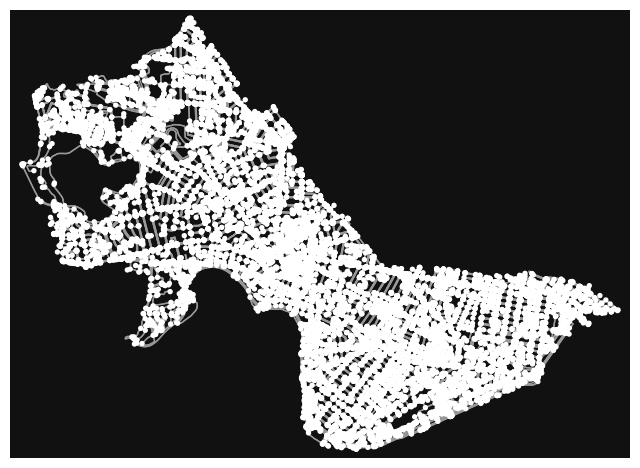

In [63]:
# Let's take a look at the graph
fig, ax = ox.plot_graph(graph)

In [64]:
# we can project the graph into epsg:3857 so that units are in meters
# using the .project_graph() function; 
# by default, osmnx graphs are created in WGS84, (epsg:4326)
graph_proj = ox.project_graph(graph, to_crs='epsg:3857')


In [65]:
# we can then convert the projected graph to a geodataframe
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(graph_proj)
graph_nodes_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

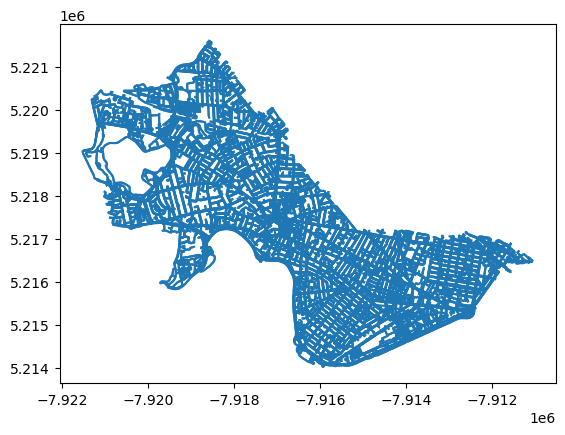

In [66]:
graph_edges_gdf.plot()

In [67]:
graph_nodes_gdf

y             x  street_count        lon        lat  \
osmid                                                                         
61175693     5.220801e+06 -7.917964e+06             3 -71.128276  42.398103   
3895955644   5.220746e+06 -7.918006e+06             3 -71.128660  42.397735   
61182955     5.218854e+06 -7.916612e+06             4 -71.116133  42.385184   
7893597542   5.218865e+06 -7.916612e+06             4 -71.116138  42.385255   
7893597530   5.218844e+06 -7.916611e+06             4 -71.116130  42.385119   
...                   ...           ...           ...        ...        ...   
12036296267  5.214481e+06 -7.914626e+06             1 -71.098291  42.356163   
12036318170  5.214452e+06 -7.914648e+06             1 -71.098489  42.355966   
12036318175  5.214396e+06 -7.914746e+06             1 -71.099371  42.355596   
12036491775  5.216694e+06 -7.918567e+06             1 -71.133694  42.370849   
12040230482  5.216837e+06 -7.912180e+06             3 -71.076321  42.371801   

                     highway  ref                          geometry  
osmid                                                                
61175693                 NaN  NaN  POINT (-7917963.521 5220801.149)  
3895955644               NaN  NaN  POINT (-7918006.179 5220745.661)  
61182955     traffic_signals  NaN   POINT (-7916611.679 5218853.87)  
7893597542          crossing  NaN  POINT (-7916612.247 5218864.676)  
7893597530          crossing  NaN  POINT (-7916611.345 5218844.104)  
...                      ...  ...                               ...  
12036296267              NaN  NaN  POINT (-7914625.506 5214481.117)  
12036318170              NaN  NaN  POINT (-7914647.547 5214451.531)  
12036318175              NaN  NaN  POINT (-7914745.753 5214395.703)  
12036491775              NaN  NaN  POINT (-7918566.583 5216693.767)  
12040230482              NaN  NaN  POINT (-7912179.817 5216837.122)  

[16937 rows x 8 columns]

In [68]:
graph_edges_gdf

osmid lanes  \
u           v           key                                               
61175693    3895955644  0                    [8615932, 386272429]     2   
3895955644  8515679674  0                               297244215   NaN   
            1092759643  0                               297244215   NaN   
            61175693    0                    [8615932, 386272429]     2   
61182955    7893597542  0                              1212708764     2   
...                                                           ...   ...   
12036318175 12036318171 0    [1299334778, 1299334779, 1299334780]   NaN   
12036491775 12036491776 0                              1299356038   NaN   
12040230482 12040230483 0                              1299828986   NaN   
            12040230484 0                              1042420666   NaN   
            12040230479 0                              1042420666   NaN   

                                            name              highway width  \
u           v           key                                                   
61175693    3895955644  0         Elmwood Street  [residential, path]  12.2   
3895955644  8515679674  0    Alewife Linear Park             cycleway   NaN   
            1092759643  0    Alewife Linear Park             cycleway   NaN   
            61175693    0         Elmwood Street  [residential, path]  12.2   
61182955    7893597542  0          Oxford Street             tertiary  15.2   
...                                          ...                  ...   ...   
12036318175 12036318171 0                    NaN     [footway, steps]   NaN   
12036491775 12036491776 0                    NaN              service   NaN   
12040230482 12040230483 0                    NaN              footway   NaN   
            12040230484 0                    NaN              footway   NaN   
            12040230479 0                    NaN              footway   NaN   

                             oneway reversed  length  \
u           v           key                            
61175693    3895955644  0     False     True  51.634   
3895955644  8515679674  0     False     True  62.071   
            1092759643  0     False    False  52.446   
            61175693    0     False    False  51.634   
61182955    7893597542  0     False    False   7.984   
...                             ...      ...     ...   
12036318175 12036318171 0     False     True  48.050   
12036491775 12036491776 0     False     True  53.915   
12040230482 12040230483 0     False     True   2.248   
            12040230484 0     False    False  31.113   
            12040230479 0     False     True  18.005   

                                                                      geometry  \
u           v           key                                                      
61175693    3895955644  0    LINESTRING (-7917963.521 5220801.149, -7917972...   
3895955644  8515679674  0    LINESTRING (-7918006.179 5220745.661, -7917922...   
            1092759643  0    LINESTRING (-7918006.179 5220745.661, -7918045...   
            61175693    0    LINESTRING (-7918006.179 5220745.661, -7918002...   
61182955    7893597542  0    LINESTRING (-7916611.679 5218853.87, -7916612....   
...                                                                        ...   
12036318175 12036318171 0    LINESTRING (-7914745.753 5214395.703, -7914776...   
12036491775 12036491776 0    LINESTRING (-7918566.583 5216693.767, -7918586...   
12040230482 12040230483 0    LINESTRING (-7912179.817 5216837.122, -7912177...   
            12040230484 0    LINESTRING (-7912179.817 5216837.122, -7912179...   
            12040230479 0    LINESTRING (-7912179.817 5216837.122, -7912181...   

                            maxspeed service  ref access bridge junction  \
u           v           key                                                
61175693    3895955644  0        NaN     NaN  NaN    NaN    NaN      NaN   
3895955644  8515679674  0       

In [69]:
# we can also get a gdf for the footprint of the place
place_footprint = ox.geocode_to_gdf(place_name)
graph_area = place_footprint.to_crs('epsg:3857')
graph_area

geometry  bbox_north  bbox_south  \
0  POLYGON ((-7921539.37 5219058.583, -7921287.91...   42.404259   42.352402   

   bbox_east  bbox_west  place_id  osm_type   osm_id        lat        lon  \
0 -71.063984 -71.160399  17925017  relation  1933745  42.365635 -71.104002   

      class            type  place_rank  importance addresstype       name  \
0  boundary  administrative          16    0.614277        city  Cambridge   

                                        display_name  
0  Cambridge, Middlesex County, Massachusetts, Un...

<Axes: >

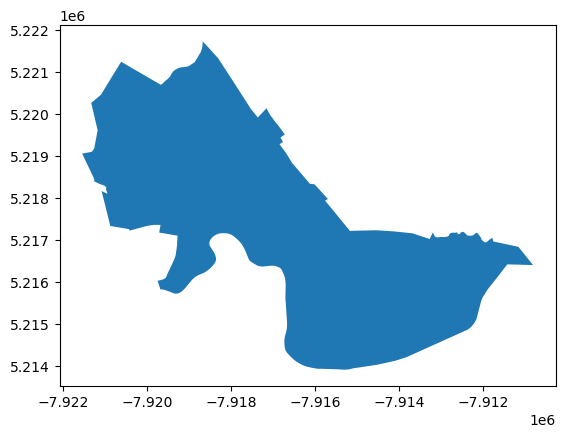

In [70]:
graph_area.plot()

## Exercises
What is the total area of cambridge in sq meters?

In [71]:
area = graph_area.loc[0,'geometry'].area
print(f'The area of Cambridge in sq meters is: {area} ')

The area of Cambridge in sq meters is: 33732850.73140596 


How many street segments in Cambridge are longer than 100 meters?

In [72]:
graph_edges_gdf[graph_edges_gdf['length'] > 100]

osmid lanes  \
u           v           key                                               
7870841842  2682542192  0                                 8616058     2   
61283218    5492841607  0                              1288824558     2   
11951116492 11951116502 0                              1288824555   NaN   
5492841607  11951116504 0                               758187788     2   
            61283218    0                              1288824558     2   
...                                                           ...   ...   
11951116506 11951116490 0                              1288824555   NaN   
11951116503 5492841607  0                              1288824557   NaN   
11972437511 11972437524 0    [1291365752, 1291365753, 1291365751]   NaN   
11972437524 11972437511 0    [1291365752, 1291365753, 1291365751]   NaN   
11989054571 12040131063 0                              1250928938   NaN   

                                      name      highway width  oneway  \
u           v           key                                             
7870841842  2682542192  0     Henry Street  residential  12.2   False   
61283218    5492841607  0    Vassar Street     tertiary  17.1   False   
11951116492 11951116502 0              NaN     cycleway   1.4    True   
5492841607  11951116504 0    Vassar Street     tertiary  17.1   False   
            61283218    0    Vassar Street     tertiary  17.1   False   
...                                    ...          ...   ...     ...   
11951116506 11951116490 0              NaN     cycleway   1.4    True   
11951116503 5492841607  0              NaN     cycleway  5'0"    True   
11972437511 11972437524 0              NaN      footway   NaN   False   
11972437524 11972437511 0              NaN      footway   NaN   False   
11989054571 12040131063 0              NaN      footway   NaN   False   

                            reversed   length  \
u           v           key                     
7870841842  2682542192  0      False  119.265   
61283218    5492841607  0      False  124.963   
11951116492 11951116502 0      False  248.358   
5492841607  11951116504 0      False  122.861   
            61283218    0       True  124.963   
...                              ...      ...   
11951116506 11951116490 0      False  188.221   
11951116503 5492841607  0      False  127.764   
11972437511 11972437524 0       True  107.334   
11972437524 11972437511 0      False  107.334   
11989054571 12040131063 0      False  146.722   

                                                                      geometry  \
u           v           key                                                      
7870841842  2682542192  0    LINESTRING (-7915873.175 5214435.427, -7915771...   
61283218    5492841607  0    LINESTRING (-7915185.109 5214455.508, -7915076...   
11951116492 11951116502 0    LINESTRING (-7915182.716 5214450.145, -7914902...   
5492841607  11951116504 0    LINESTRING (-7915044.446 5214549.704, -7915039...   
            61283218    0    LINESTRING (-7915044.446 5214549.704, -7915076...   
...                                                                        ...   
11951116506 11951116490 0    LINESTRING (-7914896.413 5214639.638, -7914848...   
11951116503 5492841607  0    LINESTRING (-7914912.076 5214651.192, -7915045...   
11972437511 11972437524 0    LINESTRING (-7916486.634 5215029.738, -7916487...   
11972437524 11972437511 0    LINESTRING (-7916426.978 5214936.471, -7916431...   
11989054571 12040131063 0    LINESTRING (-7912152.966 5216870.09, -7912157....   

                            maxspeed service  ref access bridge junction  \
u           v           key                                                
7870841842  2682542192  0     20 mph     NaN  NaN    NaN    NaN      NaN   
61283218    5492841607  0        NaN     NaN  NaN    NaN    NaN      NaN   
11951116492 11951116502 0        NaN     NaN  NaN    NaN    NaN      NaN   
5492841607  11951116504 0        NaN     NaN  NaN

## Road network statistics

In [73]:
# we can get basic stats about the network:
ox.stats.basic_stats(graph_proj)

{'n': 16937,
 'm': 50148,
 'k_avg': 5.921709865973903,
 'edge_length_total': 1644783.0119999878,
 'edge_length_avg': 32.79857645369681,
 'streets_per_node_avg': 3.2491586467497195,
 'streets_per_node_counts': {0: 0,
  1: 1230,
  2: 41,
  3: 9079,
  4: 6476,
  5: 93,
  6: 15,
  7: 1,
  8: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07262207002420736,
  2: 0.0024207356674735784,
  3: 0.5360453445120151,
  4: 0.3823581507941194,
  5: 0.005490937001830312,
  6: 0.0008856350002952116,
  7: 5.904233335301411e-05,
  8: 0.00011808466670602822},
 'intersection_count': 15707,
 'street_length_total': 903816.8579999988,
 'street_segment_count': 27360,
 'street_length_avg': 33.03424188596487,
 'circuity_avg': 0.7711381724878306,
 'self_loop_proportion': 0.001644736842105263}

Circuity is the ratio of network distance (distance traveled along roads) to euclidean distance (straight line). Higher circuity means greater inefficiency in traveling along the roads.

Check the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats) for more info about each statistic

In [74]:
# if you pass in the area, you can get density info
area_cambridge_sqm = graph_area['geometry'].area
ox.basic_stats(graph_proj, area=area_cambridge_sqm)

{'n': 16937,
 'm': 50148,
 'k_avg': 5.921709865973903,
 'edge_length_total': 1644783.0119999878,
 'edge_length_avg': 32.79857645369681,
 'streets_per_node_avg': 3.2491586467497195,
 'streets_per_node_counts': {0: 0,
  1: 1230,
  2: 41,
  3: 9079,
  4: 6476,
  5: 93,
  6: 15,
  7: 1,
  8: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07262207002420736,
  2: 0.0024207356674735784,
  3: 0.5360453445120151,
  4: 0.3823581507941194,
  5: 0.005490937001830312,
  6: 0.0008856350002952116,
  7: 5.904233335301411e-05,
  8: 0.00011808466670602822},
 'intersection_count': 15707,
 'street_length_total': 903816.8579999988,
 'street_segment_count': 27360,
 'street_length_avg': 33.03424188596487,
 'circuity_avg': 0.7711381724878306,
 'self_loop_proportion': 0.001644736842105263,
 'node_density_km': 0    502.092163
 dtype: float64,
 'intersection_density_km': 0    465.629191
 dtype: float64,
 'edge_density_km': 0    48759.08725
 dtype: float64,
 'street_density_km': 0    26793.373178
 dtype: fl

## Getting data other ways
In the above example, we used the name of a place to get the data that we wanted.

However, there are other ways to specify locations which may be more convenient.

For example, you can get [graphs from address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_address), [bounding box](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), [points](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), or [shapely polygon object](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_polygon)

The types of networks you can get are:

-    `drive` - get drivable public streets (but not service roads)
-    `drive_service` - get drivable streets, including service roads
-    `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
-    `bike` - get all streets and paths that cyclists can use
-    `all` - download all non-private OSM streets and paths
-    `all_private` - download all OSM streets and paths, including private-access ones



In [75]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), (-71.080155, 42.361553),
               (-71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters from latlong by projecting to epsg:3857
poly_m, poly_crs_m = ox.projection.project_geometry(poly, to_crs='epsg:3857')

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.projection.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs='epsg:4326', 
                                                        to_latlong=True)

'''
# get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)
'''
# Get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(
    poly_with_buffer_ll, 
    network_type='walk'
)


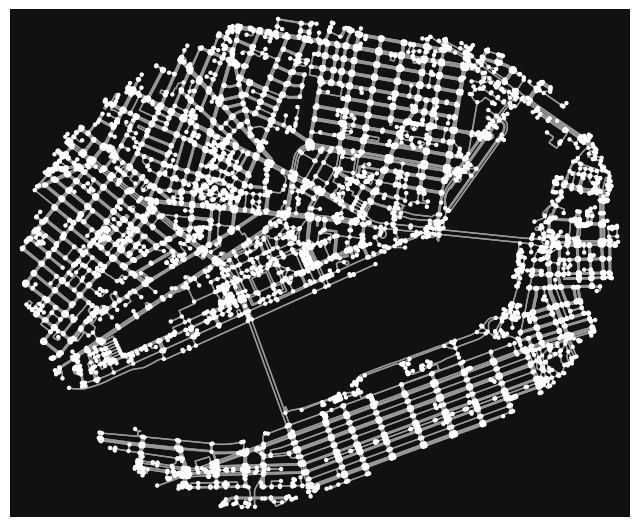

In [76]:
# let's plot it
fig, ax = ox.plot_graph(walkable_roads_near_mit, figsize=(8,10), node_size=10)

In [77]:
# example of a road
all_edges_list = list(walkable_roads_near_mit.edges) # put the id for each edge in a list
print(all_edges_list[0]) # id of first edge
print(walkable_roads_near_mit.edges[all_edges_list[0]]) # get details for first edge

(61283218, 7890342967, 0)
{'osmid': 1288824558, 'oneway': False, 'lanes': '2', 'name': 'Vassar Street', 'highway': 'tertiary', 'width': '17.1', 'reversed': True, 'length': 13.002}


In [78]:
# get attribute for all edges
walkable_roads_near_mit.edges(data='name')


OutMultiEdgeDataView([(61283218, 7890342967, 'Vassar Street'), (61283218, 7890342979, 'Amherst Alley'), (61283218, 5492841607, 'Vassar Street'), (61283269, 7866981406, 'Massachusetts Avenue'), (61283269, 7866981409, 'Massachusetts Avenue'), (61283269, 5737576890, 'Vassar Street'), (61283269, 7866981408, 'Vassar Street'), (61283293, 2694721017, 'Endicott Street'), (61283311, 7579360337, 'Endicott Street'), (61283311, 7071581206, 'Amherst Alley'), (61283311, 9692752987, 'Amherst Alley'), (61283350, 5872296719, 'Main Street'), (61283350, 5872296715, 'Main Street'), (61283350, 7866981387, 'Albany Street'), (61283361, 1053425134, 'Ames Street'), (61283361, 436587028, 'Ames Street'), (61283361, 7899628462, None), (61283361, 1753191577, None), (61283366, 7896253549, 'Technology Square'), (61283366, 5872296719, 'Main Street'), (61283366, 8519179718, 'Main Street'), (61283373, 8602936356, 'Hayward Street'), (61283373, 8646774735, 'Hayward Street'), (61283373, 9272850530, 'Main Street'), (612833

In [79]:
# example of a node (intersection)
all_nodes_list = list(walkable_roads_near_mit.nodes)
print(all_nodes_list[0]) # id of first node
print(walkable_roads_near_mit.nodes[all_nodes_list[0]]) # details for first node

61283218
{'y': 42.3559928, 'x': -71.1033176, 'street_count': 3}


In [80]:
# get attribute for all nodes
walkable_roads_near_mit.nodes(data='street_count')

NodeDataView({61283218: 3, 61283269: 4, 61283293: 1, 61283311: 3, 61283350: 3, 61283361: 4, 61283366: 3, 61283373: 4, 61283385: 3, 61317281: 1, 61317284: 1, 61317286: 3, 61317287: 3, 61317292: 3, 61317293: 3, 61317302: 3, 61317337: 3, 61317338: 3, 61317355: 3, 61317360: 3, 61317365: 3, 61317367: 4, 61317381: 3, 61317382: 3, 61317383: 3, 61317386: 3, 61317414: 1, 61317415: 1, 61317416: 3, 61317420: 5, 61317423: 5, 61317425: 3, 61317454: 3, 61317471: 1, 61317476: 3, 61317478: 3, 61317499: 3, 61317501: 3, 61317503: 3, 61317513: 1, 61317523: 3, 61317588: 4, 61317593: 1, 61317596: 3, 61317645: 1, 61317661: 3, 61317663: 3, 61317667: 4, 61317741: 3, 61317743: 3, 61318059: 4, 61318060: 4, 61318066: 1, 61318074: 1, 61318140: 3, 61318175: 3, 61318434: 4, 61318436: 4, 61318438: 3, 61318454: 3, 61318520: 4, 61318521: 3, 61318534: 4, 61318572: 4, 61318574: 3, 61318575: 3, 61318581: 3, 61318582: 4, 61318586: 3, 61318588: 3, 61318589: 4, 61318592: 3, 61318595: 3, 61318626: 3, 61318627: 3, 61320984: 4

## Exercise

How many walkable roads near MIT are longer than 100 meters?

In [81]:
print(walkable_roads_near_mit)

MultiDiGraph with 7335 nodes and 23136 edges


In [82]:
'''all_edges_list

walkable_roads_near_mit_m = ox.project_graph(walkable_roads_near_mit, to_crs='epsg:3857')
'''
_, mit_edges_m = ox.graph_to_gdfs(walkable_roads_near_mit)
print(mit_edges_m[mit_edges_m['length']>100])
'''
#long_walkable = walkable_roads_near_mit.edges(data = 'length')



num = 0
for x in walkable_roads_near_mit.edges(data = 'length'):
    if x[-1] > 100:
        num += 1
print(num)

print(long_walkable)
long_walkable_gdf= gpd.GeoDataFrame(long_walkable,
                                           geometry=gpd.points_from_xy(
                                              long_walkable['length'],
                                               )
                                           )
print(long_walkable_gdf)
long_walkable_gdf[long_walkable_gdf['length']  > 100]
'''

                                                                         osmid  \
u           v           key                                                      
61283218    5492841607  0                                           1288824558   
61283361    436587028   0                                             42769910   
61317284    2694895134  0                                            812712469   
61317287    5737576890  0                              [426604930, 1102223333]   
61317386    5244281104  0                               [443027018, 426493119]   
...                                                                        ...   
12009995215 3708708386  0                                            806281880   
12011481701 8508720244  0                                            844315856   
12055570633 7884019618  0                                            846287993   
12056325802 7896253552  0    [426671712, 1206296577, 426493091, 426493094, ...   
12056325817 1117

"\n#long_walkable = walkable_roads_near_mit.edges(data = 'length')\n\n\n\nnum = 0\nfor x in walkable_roads_near_mit.edges(data = 'length'):\n    if x[-1] > 100:\n        num += 1\nprint(num)\n\nprint(long_walkable)\nlong_walkable_gdf= gpd.GeoDataFrame(long_walkable,\n                                           geometry=gpd.points_from_xy(\n                                              long_walkable['length'],\n                                               )\n                                           )\nprint(long_walkable_gdf)\nlong_walkable_gdf[long_walkable_gdf['length']  > 100]\n"

## Routing
We can get the node closest to a point using the `ox.distance.nearest_node` function.

{2430572077: {0: {'osmid': 234938079, 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 73.691, 'geometry': <LINESTRING (-71.073 42.369, -71.073 42.369, -71.073 42.369, -71.073 42.369,...>}}, 7629198594: {0: {'osmid': 234938079, 'highway': 'footway', 'oneway': False, 'reversed': True, 'length': 8.713000000000001, 'geometry': <LINESTRING (-71.073 42.369, -71.073 42.369, -71.073 42.369, -71.073 42.369,...>}}, 7632047825: {0: {'osmid': [817179148, 844315831], 'highway': 'footway', 'oneway': False, 'reversed': False, 'length': 79.297, 'geometry': <LINESTRING (-71.073 42.369, -71.073 42.369, -71.073 42.369, -71.073 42.369,...>}}}


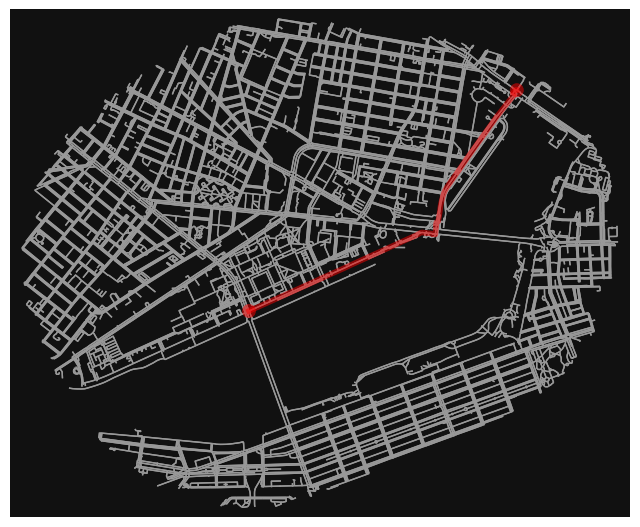

length of shortest walkable path from node 5737576908 to 7629198595 is 2249.54m


In [83]:
orig_node = ox.distance.nearest_nodes(walkable_roads_near_mit, -71.092562, 42.357602)

# let's calculate the route to a random destination node
rand_node = np.random.choice(walkable_roads_near_mit.nodes)
print(walkable_roads_near_mit[rand_node])

'''
route = ox.distance.shortest_path(walkable_roads_near_mit, 
                         orig_node, rand_node, 
                         weight='length')
'''
route = ox.routing.shortest_path(walkable_roads_near_mit, 
                         orig_node, rand_node, 
                         weight='length')

fig, ax = ox.plot_graph_route(walkable_roads_near_mit, route, node_size=0)
shortest_path_length = nx.shortest_path_length(walkable_roads_near_mit, orig_node, 
                              rand_node, weight='length')
print(f'length of shortest walkable path from node {orig_node} to {rand_node} is {shortest_path_length:.2f}m') # the {:.2f} syntax means round off to 2 digits after decimal pt

The `shortest_path` function in networkx uses [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) to efficiently calculate the shortest path between two nodes. The networkx library also provides many other useful functions on graphs; for instance, the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm), which efficiently computes the shortest paths between all pairs of nodes, and the [A* (A-star) algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm), which is similar to Dijkstra's algorithm, except it runs faster by taking advantage of a distance "approximation" that can be calculated between two nodes without knowing the shortest path outright. Check out these links if you want to learn more about these algorithms, and check out the [networkx documentation](https://networkx.github.io/documentation/networkx-2.4/index.html) if you want to learn more about all the methods networkx provides.

## Building outlines
We can get the footprint of objects such as buildings as geodataframes with `osmnx`. Here we'll get the building footprints near MIT.

In [84]:
'''

walkable_buildings_near_mit = ox.graph_from_polygon(
    poly_with_buffer_ll, 
    net\\work_type='building')
    '''

"\n\nwalkable_buildings_near_mit = ox.graph_from_polygon(\n    poly_with_buffer_ll, \n    net\\work_type='building')\n    "

In [85]:
'''
# we can get the footprints of objects within this poly
building_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'building':True})
'''
# we can get the footprints of objects within this poly
building_footprints = ox.features.features_from_polygon(poly_with_buffer_ll, tags={'building':True})


You can perform any query using OSM tags: https://wiki.openstreetmap.org/wiki/Map_features

Note that if you include multiple tags, it gets the **union** of the results, not the intersection

In [86]:
'''
road_footprints = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'highway':True}) # get roads with geometry
# note that most roads do not have footprint information
'''
road_footprints = ox.features.features_from_polygon(poly_with_buffer_ll, tags={'highway':True}) # get roads with geometry
# note that most roads do not have footprint information

In [87]:
# project into UTM for info in meters
building_footprints_proj = ox.projection.project_gdf(building_footprints)
road_footprints_proj = ox.projection.project_gdf(road_footprints)
building_footprints_proj

description level operator railway wheelchair  \
element_type osmid                                                     
node         367777182         NaN   NaN      NaN     NaN        NaN   
             367777193         NaN   NaN      NaN     NaN        NaN   
             367777196         NaN   NaN      NaN     NaN        NaN   
             367777226         NaN   NaN      NaN     NaN        NaN   
             367777292         NaN   NaN      NaN     NaN        NaN   
...                            ...   ...      ...     ...        ...   
relation     16848651          NaN   NaN      NaN     NaN        NaN   
             17409127          NaN   NaN      NaN     NaN        NaN   
             17575546          NaN   NaN      NaN     NaN        NaN   
             17705207          NaN   NaN      NaN     NaN        NaN   
             17804937          NaN   NaN      NaN     NaN        NaN   

                                                                 geometry  \
element_type osmid                                                          
node         367777182                     POINT (327563.105 4691913.104)   
             367777193                     POINT (326878.992 4690851.306)   
             367777196                     POINT (327725.747 4692003.931)   
             367777226                     POINT (329688.089 4691892.609)   
             367777292                     POINT (327397.718 4690775.222)   
...                                                                   ...   
relation     16848651   POLYGON ((327283.553 4692160.017, 327326.644 4...   
             17409127   POLYGON ((327180.012 4691927.952, 327183.457 4...   
             17575546   POLYGON ((327987.438 4690513.203, 327983.717 4...   
             17705207   POLYGON ((329130.431 4692748.495, 329167.555 4...   
             17804937   POLYGON ((327777.158 4692106.398, 327778.165 4...   

                       height access door lockable  ... bicycle_parking area  \
element_type osmid                                  ...                        
node         367777182    NaN    NaN  NaN      NaN  ...             NaN  NaN   
             367777193    NaN    NaN  NaN      NaN  ...             NaN  NaN   
             367777196    NaN    NaN  NaN      NaN  ...             NaN  NaN   
             367777226    NaN    NaN  NaN      NaN  ...             NaN  NaN   
             367777292    NaN    NaN  NaN      NaN  ...             NaN  NaN   
...                       ...    ...  ...      ...  ...             ...  ...   
relation     16848651     NaN    NaN  NaN      NaN  ...             NaN  NaN   
             17409127    20.3    NaN  NaN      NaN  ...             NaN  NaN   
             17575546     NaN    NaN  NaN      NaN  ...             NaN  NaN   
             17705207     NaN    NaN  NaN      NaN  ...             NaN  NaN   
             17804937    48.4    NaN  NaN      NaN  ...             NaN  NaN   

                       abbr_name content opening_date name:signed reservation  \
element_type osmid                                                              
node         367777182       NaN     NaN          NaN         NaN         NaN   
             367777193       NaN     NaN          NaN         NaN         NaN   
             367777196       NaN     NaN          NaN         NaN         NaN   
             367777226       NaN     NaN          NaN         NaN         NaN   
             367777292       NaN     NaN          NaN         NaN         NaN   
...                          ...     ...          ...         ...         ...   
relation     16848651        NaN     NaN          NaN         NaN         NaN   
             17409127        NaN     NaN          NaN         NaN         NaN   
             17575546        NaN     NaN          NaN         NaN         NaN   
             17705207        NaN     NaN          NaN         NaN         NaN   
             17804937        NaN     NaN          NaN         NaN      

In [88]:
# column names
building_footprints_proj.columns.values

array(['description', 'level', 'operator', 'railway', 'wheelchair',
       'geometry', 'height', 'access', 'door', 'lockable', 'man_made',
       'addr:city', 'addr:state', 'building', 'ele', 'gnis:feature_id',
       'name', 'source', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'tourism', 'bicycle', 'amenity', 'maxheight',
       'parking', 'colour', 'toilets', 'toilets:air_conditioning',
       'toilets:disposal', 'toilets:fee', 'toilets:female',
       'toilets:handwashing:soap', 'toilets:hot_water', 'toilets:male',
       'toilets:menstrual_products', 'toilets:paper_supplied',
       'toilets:position', 'toilets:unisex', 'toilets:wheelchair',
       'image', 'covered', 'surface', 'indoor', 'seasonal', 'material',
       'motor_vehicle', 'generator:output:electricity',
       'generator:source', 'location', 'operator:wikidata',
       'operator:wikipedia', 'power', 'ref', 'substation', 'transformer',
       'voltage', 'country', 'lit', 'supervised', 'emergency', 'capa

In [89]:
# drop rows where there's no shape info
building_footprints_proj = building_footprints_proj.dropna(subset=['geometry'])
road_footprints = road_footprints.dropna(subset=['geometry'])

<Axes: >

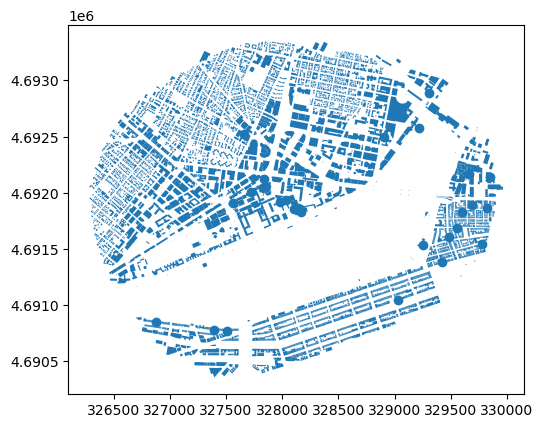

In [90]:
building_footprints_proj.plot()

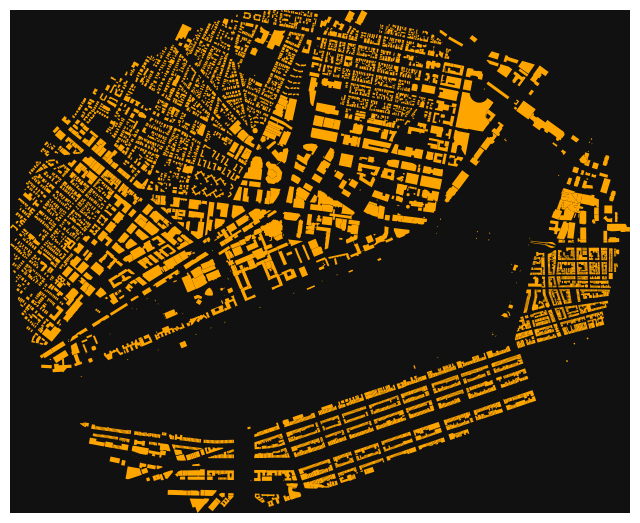

In [91]:
fig, ax = ox.plot_footprints(building_footprints_proj)

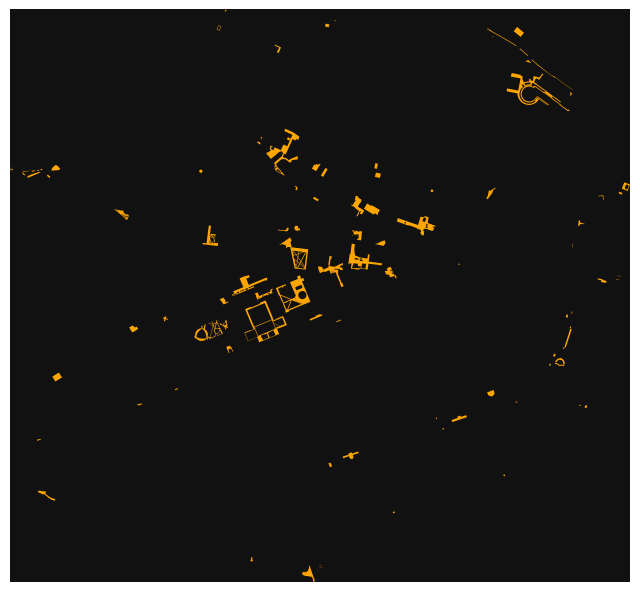

In [92]:
# plot roads with footprints
fig, ax = ox.plot_footprints(road_footprints_proj) # note that this is only a small subset of all roads

In [93]:
# save the geodataframe to a file to persist
# can choose to write only a subset of columns if you want
building_footprints_proj[['description', 'operator', 'railway', 'geometry', 'attribution',
       'source', 'addr:city', 'addr:housenumber', 'addr:postcode',
       'addr:state', 'addr:street', 'amenity']].to_file('buildings_around_mit.geojson', driver='GeoJSON')


# Exercises
Plot the walkable roads and buildings in the area near MIT in the same figure. The `osmnx` plotting features use matplotlib on the backend. Check [the documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph) for more formatting options for plotting

<Figure size 640x480 with 0 Axes>

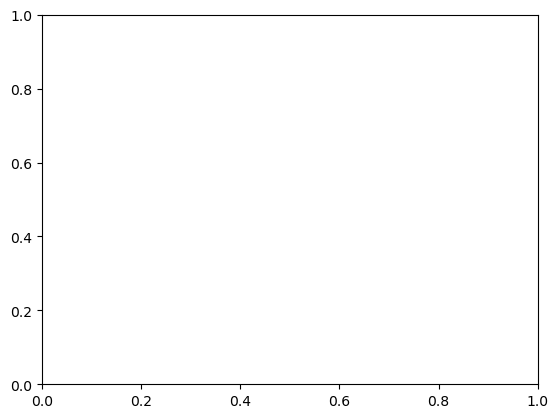

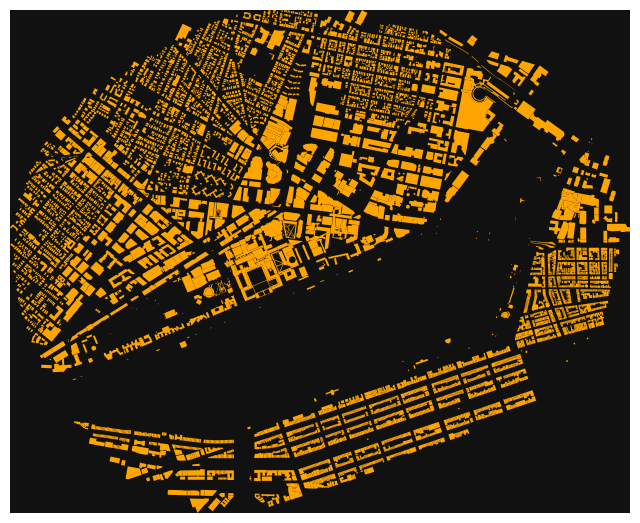

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [94]:
import pandas as pd
fig = plt.figure()
ax = plt.subplots(1,1)
my_gdf = pd.concat((building_footprints_proj, road_footprints_proj), join='inner')
ox.plot_footprints(my_gdf)

#this should work!!!
#building_footprints_proj.plot(ax=ax)
#road_footprints_proj.plot(ax=ax)

#fig, ax = ox.plot_graph(walkable_roads_near_mit, figsize=(8,10), node_size=10, show = False, close=False)
#y = ox.plot_footprints(building_footprints_proj)
#building_footprints_proj.plot(ax=ax)
#building_footprints_proj.plot()
#plt.show()


Now, go back to one of the previous exercises and plot all the nodes on the periphery of Cambridge and the roads in Cambridge in the same figure.

In [95]:
# we can also get a gdf for the footprint of the place
place_footprint = ox.geocode_to_gdf(place_name)
graph_area = place_footprint.to_crs('epsg:4326')
#graph_area.get_features
graph_area_df = pd.DataFrame(graph_area.drop(columns=graph_area.geometry.name))

#graph_area_df.get_features
#x = graph_area.loc[:, 'geometry']
#poly = Polygon(x)
#poly
#coords

In [96]:
from shapely.geometry import MultiPoint
points = MultiPoint([point for point in graph_area])
polygon = points.convex_hull
polygon_gdf = gpd.GeoDataFrame([polygon], columns=['geometry'], crs="EPSG:4326")

TypeError: iteration over a 0-d array

In [ ]:
polygon = graph_area.geometry.iloc[0]

# Extract the coordinates
coords = list(polygon.exterior.coords)
print("Coordinates of the polygon vertices:")
for coord in coords:
    print(coord)

In [ ]:
graph_area.info

In [ ]:
cambridge_boundary = ox.geocode_to_gdf(place_name)
cambridge_polygon = cambridge_boundary.geometry.iloc[0]
cambridge_poly_m, cambridge_crs_m = ox.projection.project_geometry(cambridge_polygon, to_crs='epsg:3857')

# Put a buffer of 1 mile (1609.34 m) to get everything within 1 mile
#cambridge_poly_with_buffer_m = cambridge_poly_m.buffer(1609.34)

# Convert back to lat-long
cambridge_poly, cambridge_crs_ll = ox.projection.project_geometry(
    cambridge_poly_m, 
    crs=cambridge_crs_m, 
    to_crs='epsg:4326', 
    to_latlong=True
)

cambridge_poly_with_buffer_ll

In [ ]:
graph_area = place_footprint.to_crs('epsg:4326')
polygon = graph_area.loc[:, 'geometry'][0]
polygon

In [ ]:
#polygon showing footprint of cambridge, a node for each ice cream shop

icecream = ox.features.features_from_polygon(polygon, tags={'amenity': 'ice_cream'})
icecream_proj = ox.projection.project_gdf(icecream)
#icecream_proj.plot()
#icecream_proj.crs = 'epsg:4326'
icecream_proj = icecream_proj.to_crs('epsg:4326') # degrees
#icecream_proj = icecream_proj.dropna(subset=['geometry'])
#icecream_proj.columns.values
ax = icecream_proj.plot(figsize=(10,5), alpha=0.6, cmap = 'Reds', markersize=100) #column='total_dead_and_missing', legend=True)
graph_area.plot(ax=ax, alpha = .5)
ctx.add_basemap(ax=ax, crs='epsg:4326' , source=ctx.providers.OpenStreetMap.Mapnik)

#fig, ax = ox.plot_footprints(icecream_proj)

In [ ]:
g_r = graph_area.loc[0, 'geometry']
graph_area

## Interactive graph with folium
Folium is a library which creates interactive web maps. This can be used to visualize and explore the data. However, it is slower to load and cannot scale to as large networks as the standard matplotlib plotting

In [ ]:
%%bash
pip install folium matplotlib mapclassify

In [ ]:
'''
folium_graph = ox.plot_graph_folium(walkable_roads_near_mit)
folium_graph
'''
import osmnx as ox
# pip install folium matplotlib mapclassify
# Convert the walkable roads graph to GeoDataFrames
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(walkable_roads_near_mit)

# Use the explore method to create an interactive web map
map_edges = graph_edges_gdf.explore()

# Optionally, you can save the map to an HTML file to view it in a browser
map_edges.save('walkable_roads_near_mit.html')

# To display the map in a Jupyter notebook
map_edges


In [ ]:
'''
ox.plot_route_folium(walkable_roads_near_mit, route, route_map = folium_graph, color='#ff0000')
'''
import geopandas as gpd
from shapely.geometry import LineString


# Extract the route geometry
route_nodes_gdf = graph_nodes_gdf.loc[route]
route_line = LineString(route_nodes_gdf.geometry.tolist())

# Create a GeoDataFrame for the route
route_gdf = gpd.GeoDataFrame(geometry=[route_line], crs=graph_nodes_gdf.crs) # edited to make sure graph_nodes rather than graph_edges

# Add the route to the map
map_edges = route_gdf.explore(m=map_edges, color='#ff0000', tooltip=False)

# To display the map in a Jupyter notebook
map_edges


## Get places of interest
OSM can also give places of interest, like restaurants, pharmacies, hospitals, and toilets. The full list is available [here](https://wiki.openstreetmap.org/wiki/Key:amenity).

Let's look at the POIs near MIT.

In [ ]:
'''
fast_food = ox.geometries.geometries_from_polygon(poly_with_buffer_ll, tags={'amenity': 'fast_food'})
'''
fast_food = ox.features.features_from_polygon(poly_with_buffer_ll, tags={'amenity': 'fast_food'})
fast_food

In [ ]:
walkable_nodes, walkable_edges = ox.graph_to_gdfs(walkable_roads_near_mit)

In [ ]:
# plot roads, buildings, and fast_food
fig, ax = plt.subplots(1,1, figsize=[20,20])
building_footprints.plot(ax=ax)
walkable_edges.plot(ax=ax, color='black')
fast_food.plot(ax=ax, color='#FF0099', markersize=50)
plt.show()

# Exercise
In groups, pick a location, ask an interesting question, do an analysis to answer that question.


<Axes: >

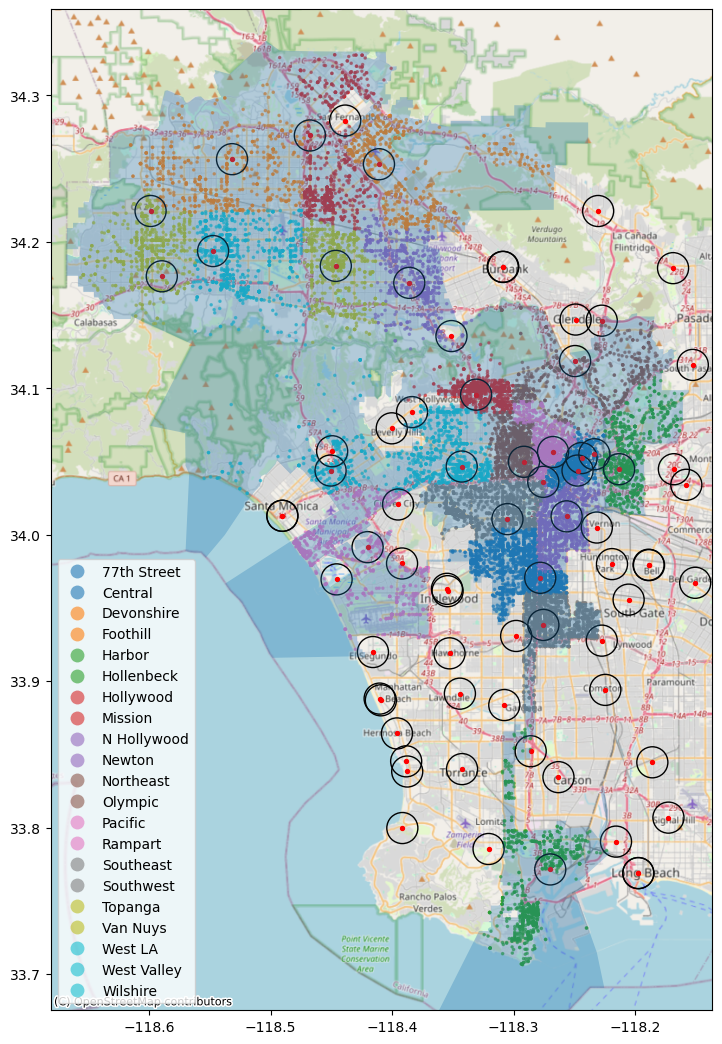

In [111]:
import pandas as pd
import geopandas as gpd
import numpy as np
crime = pd.read_csv('crime_23_filtered.csv')
crime = crime.dropna(subset = ['DATE OCC'])

crime23 = crime[crime['DATE OCC'].str.contains('2023')]
crime23['LAT'] = crime23['LAT'].astype(float)
crime23['LON'] = crime23['LON'].astype(float)

crime23 = crime23[(crime23['LAT'] != 0) | (crime23['LON'] != 0)]
# wepon crimes only
crime23 = crime23[crime23['Crm Cd Desc'].str.contains('WEAPON')]
#plots for crime
crime23_gdf = gpd.GeoDataFrame(crime23,
                                           geometry=gpd.points_from_xy(
                                              crime23['LON'],
                                               crime23['LAT']
                                               )
                                           )
crime23_gdf.crs='epsg:4326'
crime23_gdf = crime23_gdf.to_crs('epsg:4326') # degrees

ax = crime23_gdf.plot(figsize=(13, 13), alpha=0.6, markersize=2.5, column = 'AREA NAME', legend=True)

ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.OpenStreetMap.Mapnik)

#ax3.explore() <-- NVM

#police:

police = pd.read_csv('Sheriff_and_Police_Stations.csv')
police
police = police[(police['X'] < -118.15) & (police['Y'] < 34.3) * (police['Y'] > 33.6)]
police_gpd= gpd.GeoDataFrame(police,
                                           geometry=gpd.points_from_xy(
                                              police['X'],
                                               police['Y']
                                               )
                                           )
#police_gpd['geometry'] = police_gpd.geometry.buffer(.01)
police_gpd.crs='epsg:4326'
police_gpd = police_gpd.to_crs('epsg:4326') # degrees
police_gpd.plot(ax=ax, facecolor = 'none', markersize=500, edgecolor = 'black')#figsize=(10, 10), alpha=0.9, cmap = 'Set1')
police_gpd.plot(ax=ax, markersize=8, color = 'red')#figsize=(10, 10), alpha=0.9, cmap = 'Set1')

ctx.add_basemap(ax=ax, crs='epsg:4326', source=ctx.providers.OpenStreetMap.Mapnik)


#la map below:
la_place_name = "Los Angeles, California, USA"
la_place_footprint = ox.geocode_to_gdf(la_place_name)
la_graph_area = la_place_footprint.to_crs('epsg:4326')
la_graph_area.plot(ax=ax, alpha=0.3)
#limits
#ax.set_xlim(-118.7, -118.4)
#ax.set_ylim(34.15, 34.3)

#la_polygon = ox.geocode_to_gdf('Los Angeles, CA, USA')
#la_polygon.plot(ax=ax, alpha = 0.5)

#North LA:
#ax.set_xlim(-118.7, -118.4)
#ax.set_ylim(34.15, 34.3)

#Central LA:
#ax.set_xlim(-118.35, -118.2)
#ax.set_ylim(34, 34.1)

#South LA:
#ax.set_xlim(-118.35, -118.2)
#ax.set_ylim(33.9, 34)

#roads
#la_graph = ox.graph_from_place(la_place_name)
#la_graph_proj = ox.project_graph(la_graph, to_crs='epsg:4326')
#la_graph_nodes_gdf, la_graph_edges_gdf = ox.graph_to_gdfs(la_graph_proj)
#la_graph_edges_gdf.plot(ax=ax, alpha = .2)

#highways
#highway = ox.geometries.geometries_from_place('Los Angeles, CA, USA', tags={'highway': 'motorway'})
#orange_road = ox.features.features_from_polygon(la_graph_area, tags={'highway': 'primary'})
#yellow_raod = ox.features.features_from_polygon(la_graph_area, tags={'highway': 'secondary'})
##place_name_la = "Los Angeles, California, USA"

# la_graph = ox.graph_from_place(place_name)

In [291]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [285]:
la_place_name = "Los Angeles, California, USA"
la_place_footprint = ox.geocode_to_gdf(la_place_name)
la_graph_area = la_place_footprint.to_crs('epsg:4326')
la_graph_area.plot(ax=ax, alpha=0.4)

<Axes: >

In [243]:
place_name_la = "Los Angeles, California, USA"

la_graph = ox.graph_from_place(place_name_la)


/opt/conda/lib/python3.11/site-packages/osmnx/graph.py:392: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


KeyboardInterrupt: 

In [ ]:
la_graph = ox.io.save_graphml(la_graph, 'la_osmnx.graphml')

In [ ]:
la_graph = ox.io.load_graphml('la_osmnx.graphml')

In [ ]:
la_graph.graph


/tmp/ipykernel_116/3781504382.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  police_stations = ox.geometries.geometries_from_place('Los Angeles, CA, USA', tags={'amenity':'police'})
/opt/conda/lib/python3.11/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


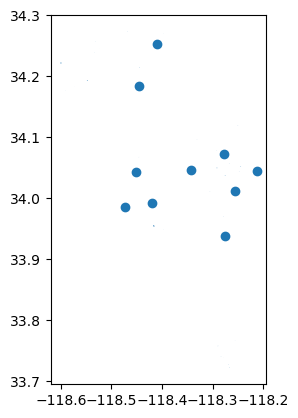

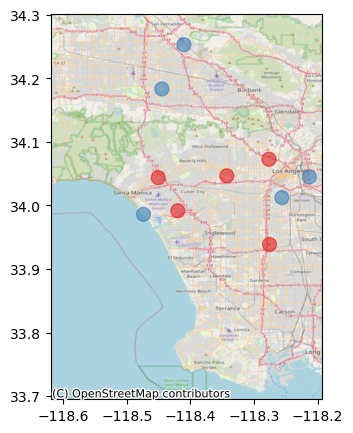

In [254]:
police_stations = ox.geometries.geometries_from_place('Los Angeles, CA, USA', tags={'amenity':'police'})
police_stations.plot()
ax = police_stations.plot(figsize=(10,5), alpha=0.6, cmap = 'Set1', markersize=100, legend = True) #column='total_dead_and_missing', legend=True)
#la_graph_area.plot(ax=ax, alpha = .5)
ctx.add_basemap(ax=ax, crs='epsg:4326' , source=ctx.providers.OpenStreetMap.Mapnik)
#v small data set --> WON'T USE

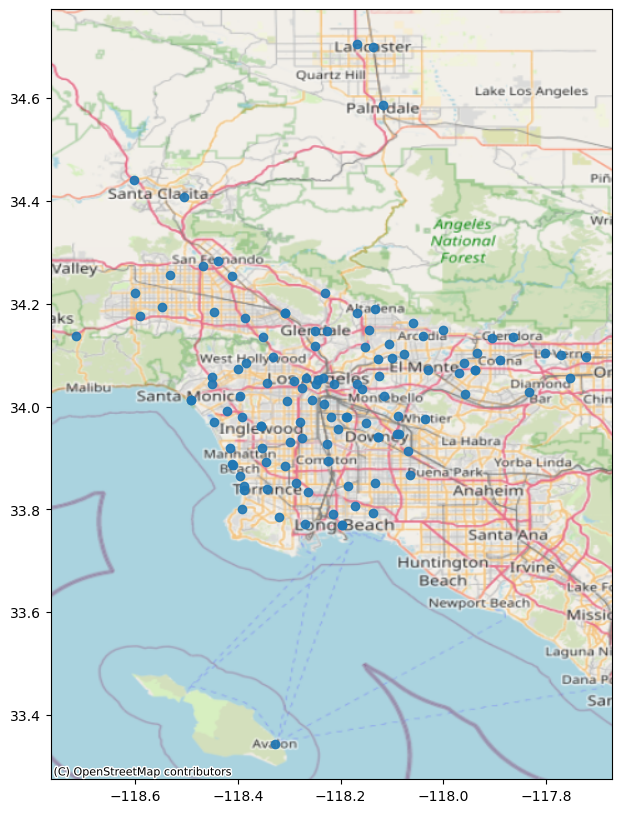

In [264]:
police = pd.read_csv('Sheriff_and_Police_Stations.csv')
police
police_gpd= gpd.GeoDataFrame(police,
                                           geometry=gpd.points_from_xy(
                                              police['X'],
                                               police['Y']
                                               )
                                           )
police_gpd.crs='epsg:4326'
police_gpd = police_gpd.to_crs('epsg:4326') # degrees

ax = police_gpd.plot(aspect=1,figsize=(10, 10), alpha=0.9)
ctx.add_basemap(ax, crs='epsg:4326', source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
fig, ax = ox.plot_graph(la_graph)

In [ ]:
la_graph_proj = ox.project_graph(la_graph, to_crs='epsg:4326')

In [ ]:
place_footprint = ox.geocode_to_gdf(place_name_la)
la_graph_area = place_footprint.to_crs('epsg:4326')
graph_area